In [112]:
import numpy as np
import pandas as pd

dataset = np.load('proyecto_training_data.npy')

headers = ['SalePrice ', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage']


print("Dataset shape:", dataset.shape)

df = pd.DataFrame(dataset, columns=headers)
# Display the dataset with headers
print("Dataset with headers:")
print(df[:1460])
null_values = df.isnull().sum()
print(null_values)


Dataset shape: (1460, 6)
Dataset with headers:
      SalePrice   OverallQual  1stFlrSF  TotRmsAbvGrd  YearBuilt  LotFrontage
0       208500.0          7.0     856.0           8.0     2003.0         65.0
1       181500.0          6.0    1262.0           6.0     1976.0         80.0
2       223500.0          7.0     920.0           6.0     2001.0         68.0
3       140000.0          7.0     961.0           7.0     1915.0         60.0
4       250000.0          8.0    1145.0           9.0     2000.0         84.0
...          ...          ...       ...           ...        ...          ...
1455    175000.0          6.0     953.0           7.0     1999.0         62.0
1456    210000.0          6.0    2073.0           7.0     1978.0         85.0
1457    266500.0          7.0    1188.0           9.0     1941.0         66.0
1458    142125.0          5.0    1078.0           5.0     1950.0         68.0
1459    147500.0          5.0    1256.0           6.0     1965.0         75.0

[1460 rows x 6 c

In [113]:


column_with_nulls = 'LotFrontage'  # Replace 'Your_Column_Name' with the actual column name

# Calculate the mean of the specified column, ignoring NaN values
column_mean = df[column_with_nulls].mean(skipna=True)

# Replace NaN values in the specified column with the mean
df[column_with_nulls].fillna(column_mean, inplace=True)


# Display the cleaned DataFrame
print("DataFrame after removing rows with empty values:")
print(df)
null_values = df.isnull().sum()
print(null_values)

DataFrame after removing rows with empty values:
      SalePrice   OverallQual  1stFlrSF  TotRmsAbvGrd  YearBuilt  LotFrontage
0       208500.0          7.0     856.0           8.0     2003.0         65.0
1       181500.0          6.0    1262.0           6.0     1976.0         80.0
2       223500.0          7.0     920.0           6.0     2001.0         68.0
3       140000.0          7.0     961.0           7.0     1915.0         60.0
4       250000.0          8.0    1145.0           9.0     2000.0         84.0
...          ...          ...       ...           ...        ...          ...
1455    175000.0          6.0     953.0           7.0     1999.0         62.0
1456    210000.0          6.0    2073.0           7.0     1978.0         85.0
1457    266500.0          7.0    1188.0           9.0     1941.0         66.0
1458    142125.0          5.0    1078.0           5.0     1950.0         68.0
1459    147500.0          5.0    1256.0           6.0     1965.0         75.0

[1460 rows x 6

In [114]:
data_array = df.to_numpy()

# Define the proportion for testing data
test_proportion = 0.2

# Shuffle the data
np.random.shuffle(data_array)

# Calculate the index to split the data
split_index = int(len(data_array) * (1 - test_proportion))

# Split the data into training and testing sets
train_data, test_data = data_array[:split_index, :], data_array[split_index:, :]

# Display the shapes of the resulting datasets
print("Training set shape:", train_data.shape)
print("Testing set shape:", test_data.shape)


Training set shape: (1168, 6)
Testing set shape: (292, 6)


In [115]:

for i, column_name in enumerate(df.columns):
    column_data = train_data[:, i]
    mean_value = np.mean(column_data)
    max_value = np.max(column_data)
    min_value = np.min(column_data)
    range_value = np.ptp(column_data)
    std_dev = np.std(column_data)

    print(f"Statistics for column '{column_name}':")
    print(f"  Mean: {mean_value}")
    print(f"  Max: {max_value}")
    print(f"  Min: {min_value}")
    print(f"  Range: {range_value}")
    print(f"  Standard Deviation: {std_dev}\n")

Statistics for column 'SalePrice ':
  Mean: 180674.06592465754
  Max: 755000.0
  Min: 34900.0
  Range: 720100.0
  Standard Deviation: 78114.42280096123

Statistics for column 'OverallQual':
  Mean: 6.1104452054794525
  Max: 10.0
  Min: 1.0
  Range: 9.0
  Standard Deviation: 1.3949372035299945

Statistics for column '1stFlrSF':
  Mean: 1159.1943493150684
  Max: 4692.0
  Min: 334.0
  Range: 4358.0
  Standard Deviation: 389.84789236367374

Statistics for column 'TotRmsAbvGrd':
  Mean: 6.5145547945205475
  Max: 14.0
  Min: 2.0
  Range: 12.0
  Standard Deviation: 1.6238147860289756

Statistics for column 'YearBuilt':
  Mean: 1970.8510273972602
  Max: 2010.0
  Min: 1872.0
  Range: 138.0
  Standard Deviation: 30.315606976303723

Statistics for column 'LotFrontage':
  Mean: 70.52837461362108
  Max: 313.0
  Min: 21.0
  Range: 292.0
  Standard Deviation: 22.14486521561376



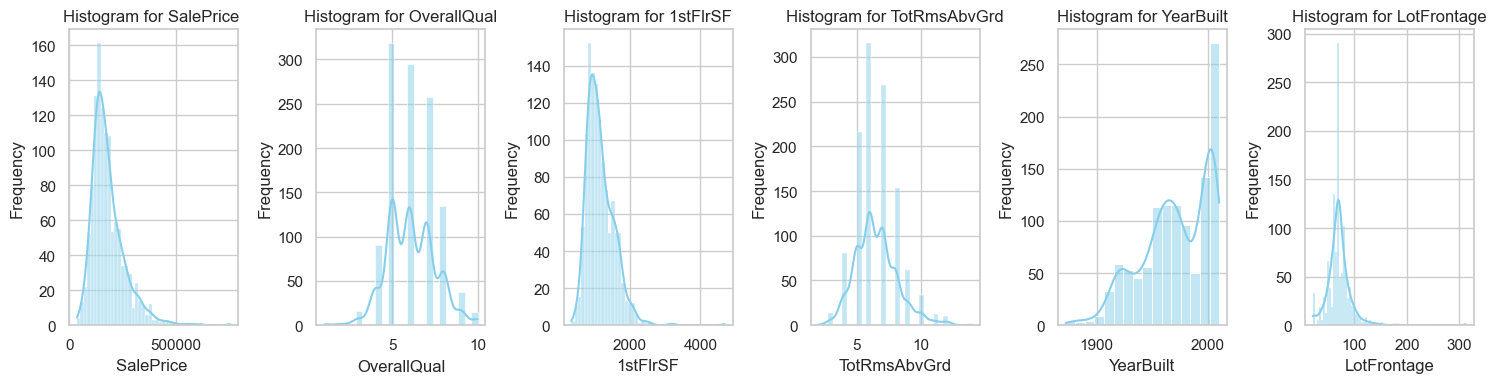

In [116]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'train_data' is your NumPy array with many columns
# Assuming 'headers' is your array with column names
# Make sure 'train_data' and 'headers' are defined from the previous code

# Create a figure and axes
fig, axes = plt.subplots(nrows=1, ncols=train_data.shape[1], figsize=(15, 4))

# Plot histograms for each column
for i, ax in enumerate(axes):
    sns.histplot(train_data[:, i], kde=True, ax=ax, color='skyblue')
    ax.set_title(f'Histogram for {headers[i]}')
    ax.set_xlabel(headers[i])
    ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [117]:

import numpy as np
import pandas as pd

# Load the dataset from the .npy file
dataset = np.load('proyecto_training_data.npy')

# Define column names
column_names = ['SalePrice ', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage']


# Convert the NumPy array to a Pandas DataFrame
df = pd.DataFrame(dataset, columns=column_names)

# Display the DataFrame with column names
print("DataFrame with column names:")
print(df.head())


DataFrame with column names:
   SalePrice   OverallQual  1stFlrSF  TotRmsAbvGrd  YearBuilt  LotFrontage
0    208500.0          7.0     856.0           8.0     2003.0         65.0
1    181500.0          6.0    1262.0           6.0     1976.0         80.0
2    223500.0          7.0     920.0           6.0     2001.0         68.0
3    140000.0          7.0     961.0           7.0     1915.0         60.0
4    250000.0          8.0    1145.0           9.0     2000.0         84.0


5


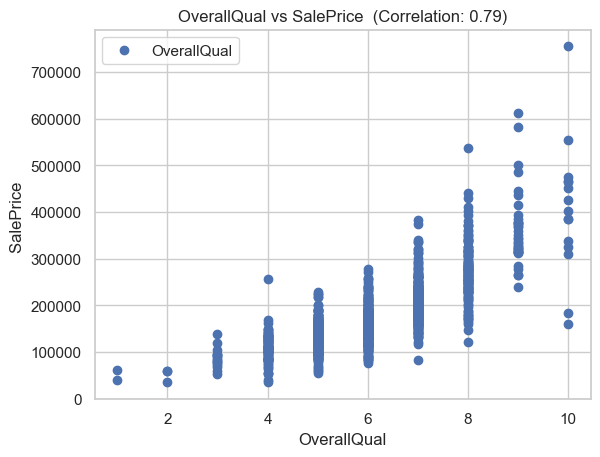

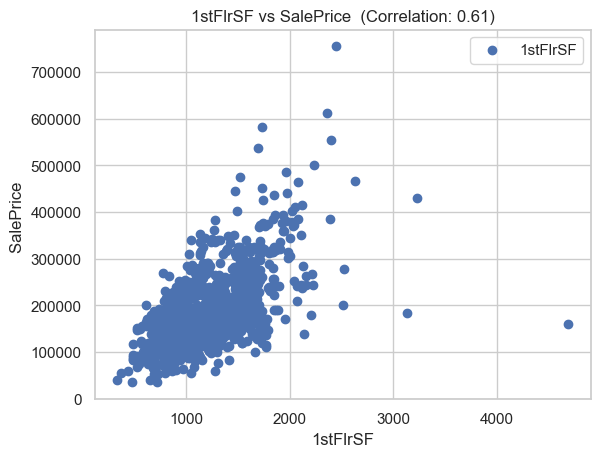

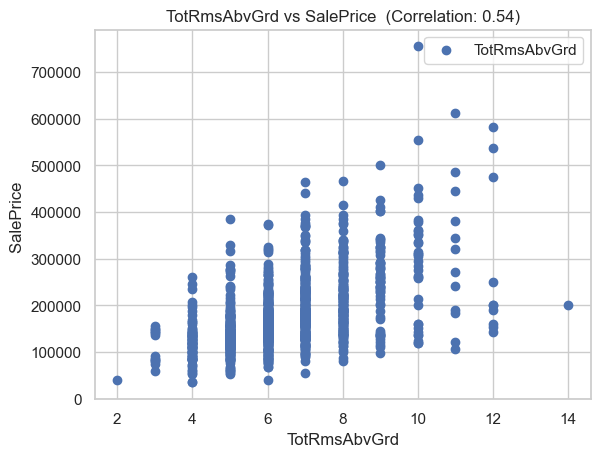

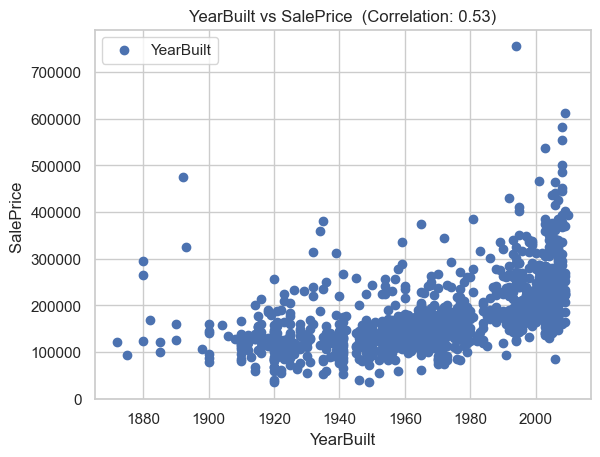

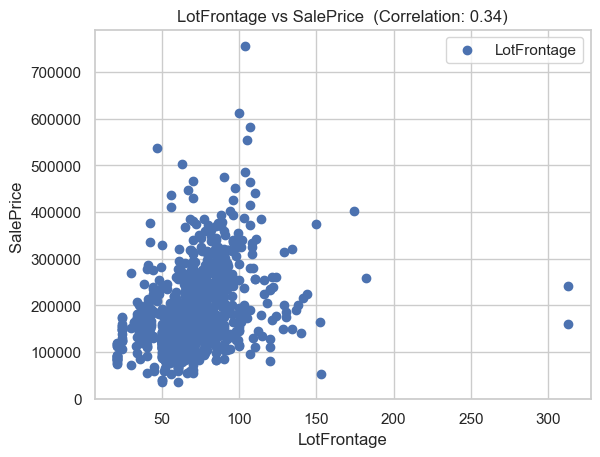

In [119]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'data' is your array with 6 columns
# 'headers' is your array with the names of the columns
# Replace this with your actual data

# Extract the dependent variable and independent variables
dependent_var = train_data[:, 0]
independent_vars = train_data[:, 1:]

# Calculate correlation coefficient and create scatter plots


for i in range(independent_vars.shape[1]):
    correlation_coefficient = np.corrcoef(independent_vars[:, i], dependent_var)[0, 1]

    # Scatter plot
    plt.scatter(independent_vars[:, i], dependent_var, label=headers[i+1])
    
    # Title with correlation coefficient
    plt.title(f'{headers[i+1]} vs {headers[0]} (Correlation: {correlation_coefficient:.2f})')
    plt.xlabel(headers[i+1])
    plt.ylabel(headers[0])
    plt.legend()
    
    # Show the plot
    plt.show()


In [100]:
import numpy as np
import matplotlib.pyplot as plt

# Extraer la variable dependiente y las variables independientes
y = train_data[:, 0]
independent_vars = train_data[:, 1:]

# Calcular el coeficiente de correlación para cada variable independiente x y la variable dependiente y
correlation_coefficients = [np.corrcoef(independent_vars[:, i], y)[0, 1] for i in range(independent_vars.shape[1])]

# Graficar scatterplot para cada variable independiente x con el coeficiente de correlación en el título
for i in range(independent_vars.shape[1]):
    plt.scatter(independent_vars[:, i], y, label=f'Correlation: {correlation_coefficients[i]:.2f}')
    plt.title(f'Scatterplot {headers[i+1]} vs {headers[0]} (Correlation: {correlation_coefficients[i]:.2f})')
    plt.xlabel(headers[i+1])
    plt.ylabel(headers[0])
    plt.legend()
    plt.show()
    
for i, correlation in enumerate(correlation_coefficients):
print(f'Correlation between {headers[i]} and y: {correlation:.2f}')

# Elegir las dos variables con mayor correlación
top_two_indices = np.argsort(np.abs(correlation_coefficients))[-2:]
top_two_variables = [headers[i] for i in top_two_indices]
print(f'Top two variables with highest correlation: {top_two_variables}')


IndentationError: expected an indented block after 'for' statement on line 22 (3955994834.py, line 23)

In [103]:
print (train_data)

[[1.49000e+05 7.00000e+00 8.51000e+02 6.00000e+00 1.93100e+03 6.00000e+01]
 [1.42953e+05 5.00000e+00 1.12000e+03 1.20000e+01 1.97900e+03 6.40000e+01]
 [2.52000e+05 8.00000e+00 1.08200e+03 9.00000e+00 2.00500e+03 8.50000e+01]
 ...
 [1.79500e+05 5.00000e+00 1.05200e+03 8.00000e+00 1.93900e+03 6.00000e+01]
 [2.37500e+05 6.00000e+00 2.11700e+03 7.00000e+00 1.97000e+03         nan]
 [3.25624e+05 8.00000e+00 1.61000e+03 8.00000e+00 2.00700e+03 8.60000e+01]]
